In [1]:
%matplotlib inline

In [2]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, \
UpSampling2D, Conv2DTranspose

Using TensorFlow backend.


In [3]:
import imageio
x = imageio.imread('kittens.jpg')
x.shape 
# Dimensions of image 601 x 900, number of channels 3

(601, 900, 3)

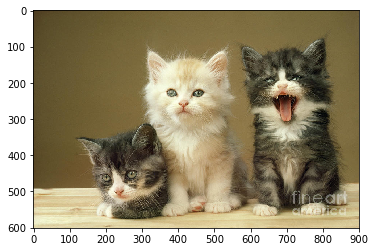

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x)

## Convolution layer
Assemble a model containing only input and convolutional layer.

Convolutional layer is defined by:

keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', activation=None, use_bias=True, kernel_initializer='glorot_uniform', ...)

where:

 - filters: Integer, the dimensionality of the output space (i.e. the number of filters in the convolution)
 - kernel_size: An integer or tuple/list of 2 integers, specifying the width and height of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions
 - strides: An integer or tuple/list of 2 integers, specifying the strides of the convolution along the width and height. Can be a single integer to specify the same value for all spatial dimensions
 - padding: One of "valid" or "same" (case-insensitive)
 - activation: Activation function to use (see activations). If not specified, no activation is applied (ie. "linear" activation: a(x) = x)
 - use_bias: Boolean, whether the layer uses a bias vector
 - kernel_initializer: Initializer for the kernel weights matrix (see initializers).

Create convolution layer with 4 filters, kernel size  (21×21)(21×21)  and strides  (1×1)(1×1) 

In [5]:
#inputs = Input((None, None, 3))
inputs = Input((601,900,3))
conv = Conv2D(filters=4, kernel_size=(21, 21), strides=(1,1), 
              padding='same', use_bias=False)(inputs)
conv_model = Model(inputs=inputs, outputs=conv)

In [6]:
# See the shapes of input and output in the summary
conv_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 601, 900, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 601, 900, 4)       5292      
Total params: 5,292
Trainable params: 5,292
Non-trainable params: 0
_________________________________________________________________


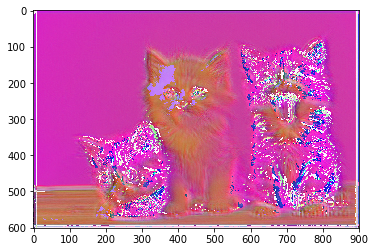

In [7]:
batch = np.expand_dims(x, 0)  # model.predict expects not one image, but a batch of images
y0 = conv_model.predict(batch)[0].astype('uint8')
plt.imshow(y0)


Now, instead of random initialization of the layer fix convolution weights.

Reduce the size of the network to 3 filters: one will be applied to each channel.

First, apply horizontal filter and pass it to the layer without training.

In [8]:
#inputs = Input((None, None, 3))
inputs = Input((601,900,3))
conv = Conv2D(filters=3, kernel_size=(21, 21), strides=(1,1), 
              padding='same', use_bias=False)(inputs)
conv_model = Model(inputs=inputs, outputs=conv)
conv_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 601, 900, 3)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 601, 900, 3)       3969      
Total params: 3,969
Trainable params: 3,969
Non-trainable params: 0
_________________________________________________________________


In [9]:
horizontal_filter = np.zeros(shape=(21,21,3,3))
for i in range(3):
    horizontal_filter[10,:,i,i] = 1.0/21.0
# fixing convolution weights
conv_model.layers[1].set_weights([horizontal_filter])

[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 ...


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 

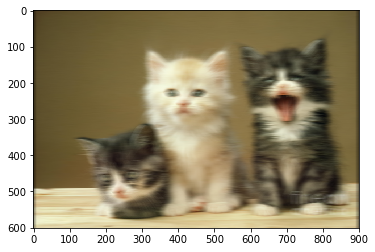

In [10]:
#Apply convolution with horizontal filter to each channel of the image:
y1 = conv_model.predict(batch)[0].astype('uint8')
plt.imshow(y1)

Note that horizontal lines (such as cat's whiskers) get enhanced, while everything else gets blurred.

Create a vertical filter and apply it to the same image.

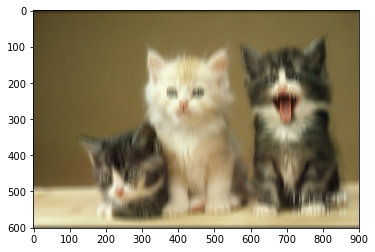

In [11]:
vertical_filter = np.zeros(shape=(21,21,3,3))
for i in range(3):
    vertical_filter[:,10,i,i] = 1.0/21.0
conv_model.layers[1].set_weights([vertical_filter])
y2 = conv_model.predict(batch)[0].astype('uint8')
plt.imshow(y2)

Note that this time vertical lines (such as cat's claws or vertical fur stripes) get enhanced, while everything else gets blurred.

## MaxPooling Layer

Creating [max pooling](https://faroit.github.io/keras-docs/1.1.2/layers/pooling/) layer   is done by:

`keras.layers.pooling.MaxPooling2D(pool_size=(2, 2), strides=None, border_mode='valid', dim_ordering='default')`


- pool_size: tuple of 2 integers, factors by which to downscale (vertical, horizontal). Default value (2, 2) will halve the image in each dimension.
- strides: tuple of 2 integers, or None. Strides values. If None, it will default to pool_size.
- border_mode: 'valid' or 'same'.
- dim_ordering: 'th' or 'tf'. In 'th' mode, the channels dimension (the depth) is at index 1, in 'tf' mode is it at index 3. It defaults to the image_dim_ordering value found in Keras config file at ~/.keras/keras.json. If you never set it, then it will be "tf".

Assemble a model with only an input and max pooling layer.

In [12]:
inputs = Input((None, None, 3))
maxpool = MaxPooling2D(pool_size=(2, 2))(inputs)
maxpool_model = Model(inputs=inputs, outputs=maxpool)
maxpool_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, None, None, 3)     0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [13]:
inputs = Input((601, 900, 3))
maxpool = MaxPooling2D(pool_size=(2,2))(inputs)
maxpool_model = Model(inputs=inputs, outputs=maxpool)
maxpool_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 601, 900, 3)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 300, 450, 3)       0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


(601, 900, 3)
(300, 450, 3)


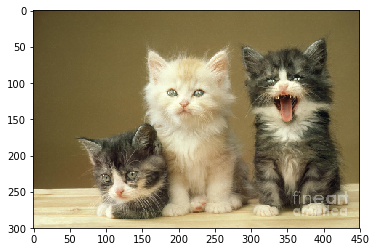

In [14]:
y3 = maxpool_model.predict(batch)[0].astype('uint8')
print(x.shape)
print(y3.shape)
plt.imshow(y3)

Note that MaxPooling transformation downscales original image in each dimension according to 'pool_size'.